In [1]:
import pandas as pd
import numpy as np

In [26]:
import keras

In [2]:
from keras import models

In [39]:
import tensorflow as tf
import datetime

In [4]:
from keras import layers

In [5]:
import glob2
path = "/Users/aknurkassym/Desktop/Projects/SmartCity"
file_list = glob2.glob(path + "/*.xlsx")

excl_list = []
 
for file in file_list:
    excl_list.append(pd.read_excel(file))

excl_merged = pd.concat(excl_list, ignore_index=True)

excl_merged.to_excel('data.xlsx', index=False)

In [6]:
df = pd.read_excel('data.xlsx')
df.head(15)

,Time of day,Week,Distance,Flow (Veh/5 Minutes),Speed (mph)
0,1,1,2.78,72,74.5
1,2,1,2.78,56,73.5
2,3,1,2.78,47,75.5
3,4,1,2.78,63,73.5
4,5,1,2.78,44,72.2
5,6,1,2.78,43,73.3
6,7,1,2.78,43,72.4
7,8,1,2.78,40,74.5
8,9,1,2.78,49,74.5
9,10,1,2.78,36,75.9


In [7]:
df.describe()

,Time of day,Week,Distance,Flow (Veh/5 Minutes),Speed (mph)
count,24192.000000,24192.000000,24192.000000,24192.000000,24192.000000
mean,2016.500000,4.000000,2.443333,351.813657,67.400599
std,1163.962164,2.000041,1.638332,224.413025,10.882657
min,1.000000,1.000000,0.000000,8.000000,6.700000
25%,1008.750000,2.000000,0.990000,118.000000,67.100000
50%,2016.500000,4.000000,2.480000,376.000000,71.200000
75%,3024.250000,6.000000,3.840000,552.000000,73.200000
max,4032.000000,7.000000,4.870000,815.000000,78.600000


In [12]:
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

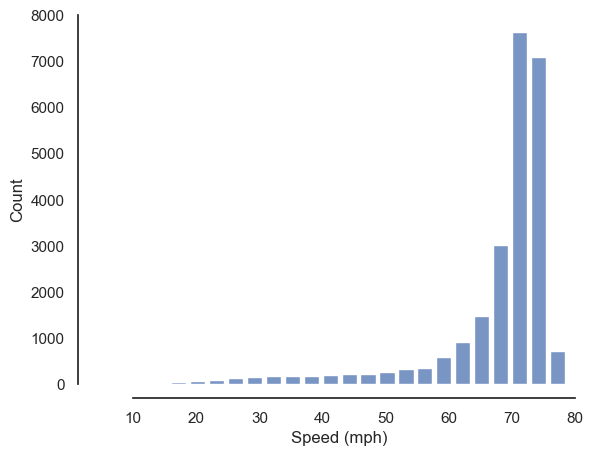

In [13]:
sns.set(style="white")
sns.histplot(data=df, x='Speed (mph)', bins=10, binwidth=3, shrink=.8 )
sns.despine(offset=10, trim=True)
plt.show()

In [293]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import sklearn.preprocessing
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.impute import SimpleImputer
import os


from pylab import rcParams
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import Normalize

In [294]:
X = df.iloc[:,0:3]
Y= df['Speed (mph)']

In [295]:
X.head()
X = X.drop(['Week'], axis=1)

,Time of day,Week,Distance
0,1,1,2.78
1,2,1,2.78
2,3,1,2.78
3,4,1,2.78
4,5,1,2.78


In [321]:

N = sklearn.preprocessing.normalize(X, norm='l2', axis=1, copy=True, return_norm=False)

In [326]:
N

array([[0.33847974, 0.94097368],
       [0.58399699, 0.81175582],
       [0.73348976, 0.67970051],
       ...,
       [0.99999927, 0.00120844],
       [0.99999927, 0.00120814],
       [0.99999927, 0.00120784]])

In [327]:
def train_val_test(X, Y, test_size_full=0.4, test_size_train=0.3, random_state=42):
    
    scaler = scaler = MinMaxScaler()
    X = scaler.fit_transform(X)
    
    X_train_full, X_test, Y_train_full, Y_test = train_test_split(X, Y, test_size=test_size_full, random_state=random_state)
    X_train, X_val, Y_train, Y_val = train_test_split(X_train_full, Y_train_full, test_size=test_size_train, random_state=random_state)

    return X_train, X_test, X_val, Y_train, Y_test, Y_val

In [329]:
X_train, X_test, X_val, Y_train, Y_test, Y_val = train_val_test(N, Y)

In [330]:
model = models.Sequential()

In [331]:
# # Model 1
model.add(layers.Dense(25, input_dim=2, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='linear'))

In [332]:
RUN_NAME = 'overfit'
logger = keras.callbacks.TensorBoard(
    log_dir='logs/{}'.format(RUN_NAME),
    write_graph=True,
    histogram_freq=5
)

In [333]:
from keras.optimizers import SGD

In [334]:
model.compile(optimizer='adam',
              loss='mean_squared_error')

In [335]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [336]:
history = model.fit(X_train,
                    Y_train,
                    epochs=400,
                    batch_size=50,
                    validation_data=(X_val, Y_val),
                    callbacks=[logger])

Epoch 1/400
204/204 [==============================] - 0s 1ms/step - loss: 3407.1252 - val_loss: 896.6618
Epoch 2/400
204/204 [==============================] - 0s 901us/step - loss: 196.6171 - val_loss: 124.6687
Epoch 3/400
204/204 [==============================] - 0s 896us/step - loss: 113.7787 - val_loss: 124.6551
Epoch 4/400
204/204 [==============================] - 0s 897us/step - loss: 113.7647 - val_loss: 124.8714
Epoch 5/400
204/204 [==============================] - 0s 902us/step - loss: 113.7372 - val_loss: 124.8275
Epoch 6/400
204/204 [==============================] - 0s 962us/step - loss: 113.7559 - val_loss: 124.5926
Epoch 7/400
204/204 [==============================] - 0s 910us/step - loss: 113.7530 - val_loss: 124.6757
Epoch 8/400
204/204 [==============================] - 0s 896us/step - loss: 113.7644 - val_loss: 124.5283
Epoch 9/400
204/204 [==============================] - 0s 899us/step - loss: 113.6842 - val_loss: 124.5381
Epoch 10/400
204/204 [================

204/204 [==============================] - 0s 899us/step - loss: 112.7155 - val_loss: 123.3333
Epoch 78/400
204/204 [==============================] - 0s 943us/step - loss: 112.6436 - val_loss: 123.1030
Epoch 79/400
204/204 [==============================] - 0s 892us/step - loss: 112.6761 - val_loss: 123.0032
Epoch 80/400
204/204 [==============================] - 0s 890us/step - loss: 112.4920 - val_loss: 123.1763
Epoch 81/400
204/204 [==============================] - 0s 953us/step - loss: 112.5033 - val_loss: 123.0004
Epoch 82/400
204/204 [==============================] - 0s 896us/step - loss: 112.6973 - val_loss: 123.1270
Epoch 83/400
204/204 [==============================] - 0s 891us/step - loss: 112.6151 - val_loss: 122.9774
Epoch 84/400
204/204 [==============================] - 0s 896us/step - loss: 112.3088 - val_loss: 123.2067
Epoch 85/400
204/204 [==============================] - 0s 892us/step - loss: 112.6560 - val_loss: 122.9718
Epoch 86/400
204/204 [===================

204/204 [==============================] - 0s 894us/step - loss: 112.5441 - val_loss: 123.0833
Epoch 153/400
204/204 [==============================] - 0s 896us/step - loss: 112.1656 - val_loss: 123.2912
Epoch 154/400
204/204 [==============================] - 0s 890us/step - loss: 112.3016 - val_loss: 122.7563
Epoch 155/400
204/204 [==============================] - 0s 895us/step - loss: 112.3699 - val_loss: 122.6299
Epoch 156/400
204/204 [==============================] - 0s 952us/step - loss: 112.1949 - val_loss: 122.6534
Epoch 157/400
204/204 [==============================] - 0s 899us/step - loss: 112.6465 - val_loss: 122.6292
Epoch 158/400
204/204 [==============================] - 0s 893us/step - loss: 112.2790 - val_loss: 122.9834
Epoch 159/400
204/204 [==============================] - 0s 895us/step - loss: 112.1689 - val_loss: 122.7078
Epoch 160/400
204/204 [==============================] - 0s 893us/step - loss: 112.2030 - val_loss: 122.6190
Epoch 161/400
204/204 [==========

204/204 [==============================] - 0s 898us/step - loss: 112.3707 - val_loss: 124.0480
Epoch 228/400
204/204 [==============================] - 0s 893us/step - loss: 112.3220 - val_loss: 123.7689
Epoch 229/400
204/204 [==============================] - 0s 893us/step - loss: 112.3674 - val_loss: 122.6646
Epoch 230/400
204/204 [==============================] - 0s 893us/step - loss: 112.3017 - val_loss: 122.6464
Epoch 231/400
204/204 [==============================] - 0s 950us/step - loss: 112.2509 - val_loss: 122.7146
Epoch 232/400
204/204 [==============================] - 0s 898us/step - loss: 112.3094 - val_loss: 122.9363
Epoch 233/400
204/204 [==============================] - 0s 892us/step - loss: 112.1806 - val_loss: 122.8119
Epoch 234/400
204/204 [==============================] - 0s 891us/step - loss: 112.5302 - val_loss: 122.9552
Epoch 235/400
204/204 [==============================] - 0s 891us/step - loss: 112.2971 - val_loss: 123.7421
Epoch 236/400
204/204 [==========

204/204 [==============================] - 0s 895us/step - loss: 112.3686 - val_loss: 122.7239
Epoch 303/400
204/204 [==============================] - 0s 889us/step - loss: 112.3081 - val_loss: 123.2102
Epoch 304/400
204/204 [==============================] - 0s 893us/step - loss: 112.1393 - val_loss: 122.8569
Epoch 305/400
204/204 [==============================] - 0s 892us/step - loss: 112.2803 - val_loss: 122.5927
Epoch 306/400
204/204 [==============================] - 0s 954us/step - loss: 112.3814 - val_loss: 122.8497
Epoch 307/400
204/204 [==============================] - 0s 897us/step - loss: 112.1653 - val_loss: 124.0227
Epoch 308/400
204/204 [==============================] - 0s 893us/step - loss: 112.1203 - val_loss: 123.0826
Epoch 309/400
204/204 [==============================] - 0s 891us/step - loss: 112.1599 - val_loss: 123.5915
Epoch 310/400
204/204 [==============================] - 0s 893us/step - loss: 112.2961 - val_loss: 122.6714
Epoch 311/400
204/204 [==========

204/204 [==============================] - 0s 997us/step - loss: 112.1882 - val_loss: 123.4810
Epoch 378/400
204/204 [==============================] - 0s 1ms/step - loss: 112.2074 - val_loss: 122.5705
Epoch 379/400
204/204 [==============================] - 0s 894us/step - loss: 112.4841 - val_loss: 122.7630
Epoch 380/400
204/204 [==============================] - 0s 895us/step - loss: 112.3081 - val_loss: 122.5695
Epoch 381/400
204/204 [==============================] - 0s 954us/step - loss: 112.0833 - val_loss: 122.6663
Epoch 382/400
204/204 [==============================] - 0s 897us/step - loss: 112.1480 - val_loss: 122.8383
Epoch 383/400
204/204 [==============================] - 0s 890us/step - loss: 112.2809 - val_loss: 124.1529
Epoch 384/400
204/204 [==============================] - 0s 891us/step - loss: 112.1677 - val_loss: 123.4172
Epoch 385/400
204/204 [==============================] - 0s 894us/step - loss: 112.1320 - val_loss: 122.6582
Epoch 386/400
204/204 [============

KeyError: 'accuracy'

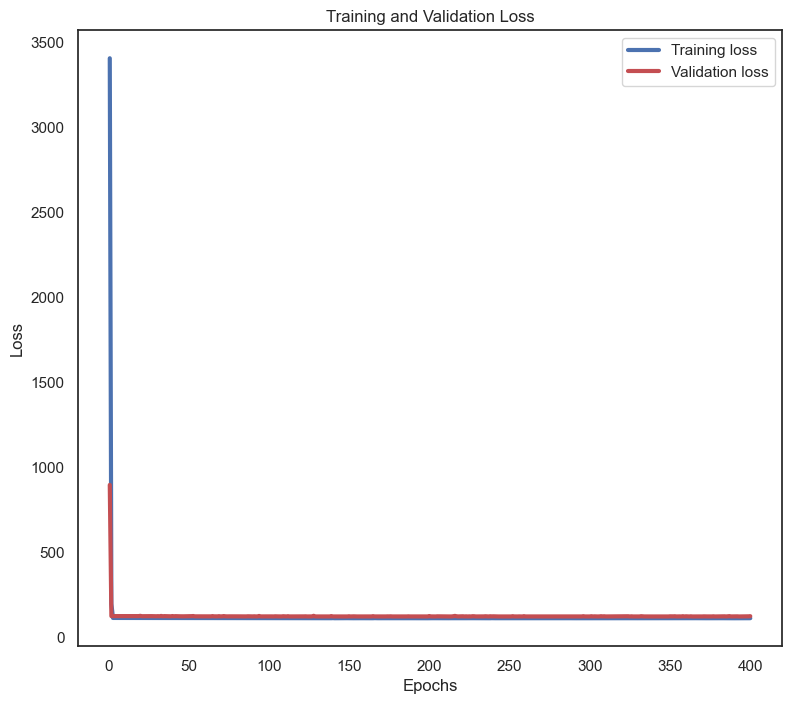

In [337]:
# line plots
plt.rcParams.update({'font.size': 20})
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
fig_3 = plt.figure(figsize=(20,8))
plt.subplots_adjust(hspace = 0.3)
ax3 = fig_3.add_subplot(1,2,1)
ax3.plot(epochs, loss, 'b-', label='Training loss', linewidth=3)
ax3.plot(epochs, val_loss, 'r', label='Validation loss', linewidth=3)
ax3.set_title('Training and Validation Loss')
ax3.set_xlabel('Epochs')
ax3.set_ylabel('Loss')
ax3.legend(loc='best')


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

ax4 = fig_3.add_subplot(1,2,2)
ax4.plot(epochs, acc, 'b-', label='Training acc', linewidth=3)
ax4.plot(epochs, val_acc, 'r', label='Validation acc', linewidth=3)
ax4.set_title('Training and Validation Accuracy')
ax4.set_xlabel('Epochs')
ax4.set_ylabel('ACC')
ax4.legend(loc='best')

plt.savefig("Sup_6.png", bbox_inches='tight')

In [338]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_77 (Dense)            (None, 25)                75        
                                                                 
 dense_78 (Dense)            (None, 64)                1664      
                                                                 
 dense_79 (Dense)            (None, 1)                 65        
                                                                 
Total params: 1,804
Trainable params: 1,804
Non-trainable params: 0
_________________________________________________________________
